In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

raw_data = pd.read_csv('cleaned_data.csv')
df = raw_data.copy()


In [134]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
Month_Year     0
Total          0
dtype: int64

In [135]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year,Total
count,1022476,1022476,1022476,1.022476e+06,1022476,1.022476e+06,1.022476e+06,1022476,1022476,1.022476e+06
unique,47398,4926,5408,NaN,43505,NaN,NaN,43,25,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11,NaN
freq,1113,5644,5734,NaN,1113,NaN,NaN,939756,82806,NaN
mean,NaN,NaN,NaN,1.049241e+01,NaN,3.867156e+00,1.631574e+04,NaN,NaN,1.836185e+01
std,NaN,NaN,NaN,1.690033e+02,NaN,6.305252e+01,2.423859e+03,NaN,NaN,2.777685e+02
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,1.234600e+04,NaN,NaN,-1.684696e+05
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,1.432900e+04,NaN,NaN,3.750000e+00
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,1.612600e+04,NaN,NaN,9.950000e+00
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.130000e+00,1.799200e+04,NaN,NaN,1.770000e+01


### There are negative values for the quantity 
#### This might indicate discounts and return purchases of some form thus we filter them out for our RFM valuation

In [136]:
df = df[(df['Quantity']>0)]
df = df[(df['Price']>0)]

df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year,Total
count,1004437,1004437,1004437,1.004437e+06,1004437,1.004437e+06,1.004437e+06,1004437,1004437,1.004437e+06
unique,39752,4911,5392,NaN,36928,NaN,NaN,43,25,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11,NaN
freq,1113,5511,5601,NaN,1113,NaN,NaN,924345,81790,NaN
mean,NaN,NaN,NaN,1.114842e+01,NaN,3.517832e+00,1.633915e+04,NaN,NaN,1.974415e+01
std,NaN,NaN,NaN,1.286908e+02,NaN,2.750591e+01,2.428512e+03,NaN,NaN,2.016917e+02
min,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e-03,1.234600e+04,NaN,NaN,1.000000e-03
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,1.436500e+04,NaN,NaN,4.130000e+00
50%,NaN,NaN,NaN,4.000000e+00,NaN,2.100000e+00,1.616100e+04,NaN,NaN,1.008000e+01
75%,NaN,NaN,NaN,1.200000e+01,NaN,4.130000e+00,1.804100e+04,NaN,NaN,1.770000e+01


## We want to build a RFM profile for our customer dataset


In [144]:

# Assuming 'Date' column is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary values
current_date = max(df['Date']) + pd.DateOffset(days=1)
rfm_data = df.groupby('CustomerID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'CustomerID': 'count',
    'Total': 'sum'
})

# Rename the columns
rfm_data.rename(columns={
    'Date': 'recency',
    'CustomerID': 'frequency',
    'Total': 'monetary_value'
}, inplace=True)

In [145]:
finaldf = rfm_data.copy()
finaldf

,recency,frequency,monetary_value
CustomerID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,46,1658.40
12349.0,19,172,3678.69
12350.0,310,16,294.40
...,...,...,...
20989.0,1,2,3.35
20990.0,1,634,5699.00
20991.0,1,730,6756.06


# Preprocessing the data for our algorithm
### Removing outliers and feature scaling

recency: 


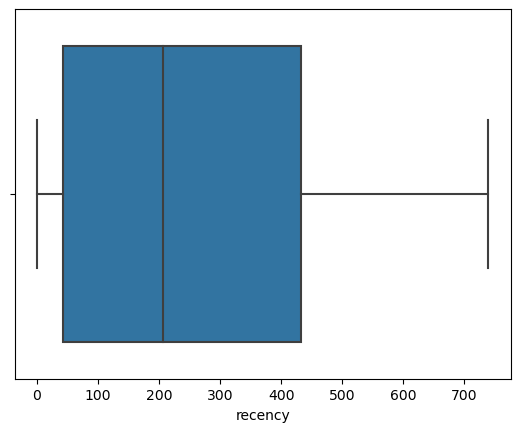

frequency: 


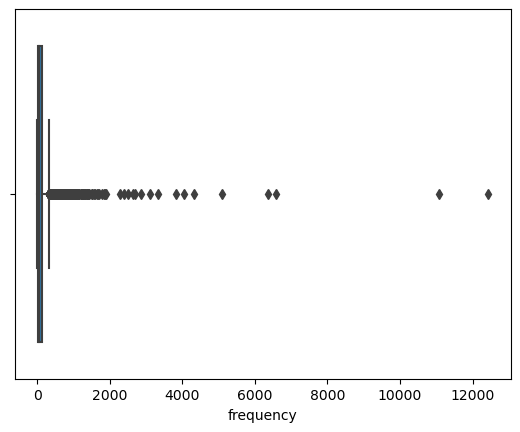

monetary_value: 


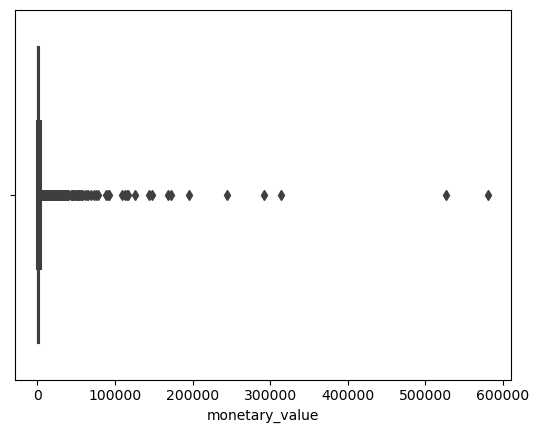

In [146]:
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

# We explore the data to see if there are any outliers

In [147]:
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

### Standardization

In [148]:
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

# Building The Customer Segmentation Model

## To find the best model to build we need to first test to see which clustering method to deploy

### We shall use the elbow method to find the optimal number of clusters

c:\Users\27722\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


Text(0, 0.5, 'Inertia')

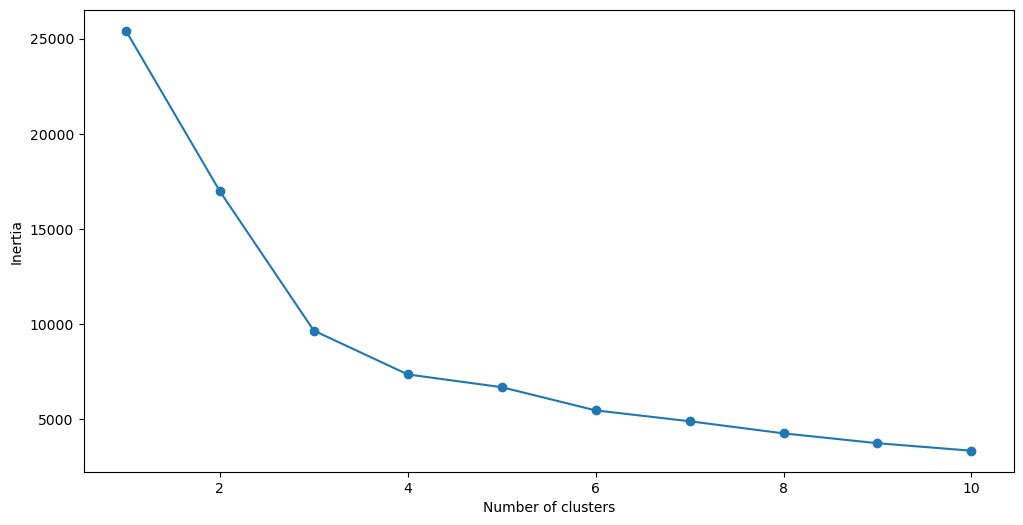

In [149]:
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto', max_iter=1000, random_state=0,algorithm='elkan')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette scores')

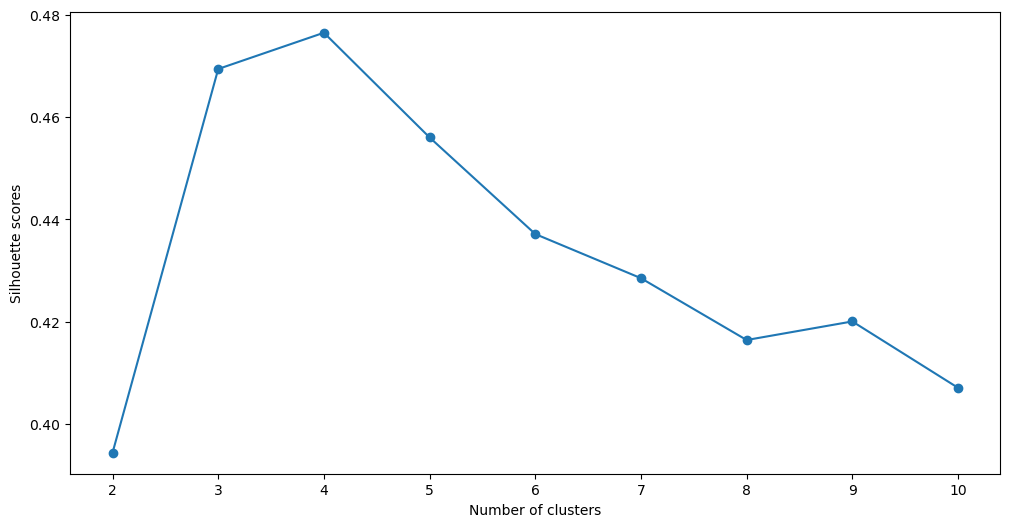

In [150]:
Sil_scores = []
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto', max_iter=1000, random_state=0,algorithm='elkan')
    kmeans.fit(scaled_features)
    Sil_scores.append(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

plt.figure(figsize=(12,6))
plt.plot(range(2,11), Sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')

## The optimal cluster number is found to be 4 thus we shall build according to this

In [151]:
# First, build a model with 4 clusters
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init='auto', max_iter=1000, random_state=0,algorithm='elkan')
kmeans.fit(scaled_features)

# We want to tr=est the performance of our data
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4764600543236563


### Now we interprete the results and visualize

In [152]:
scaled_features.shape

(8472, 3)

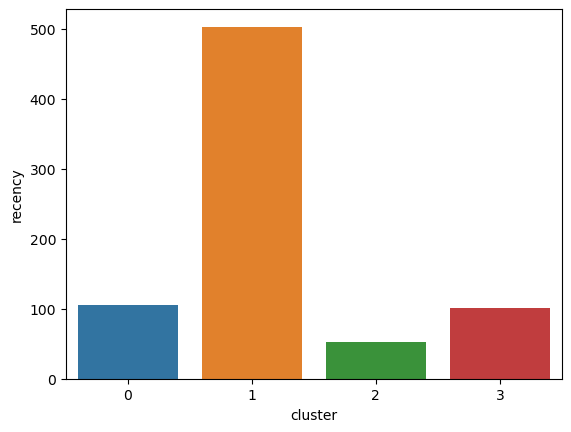

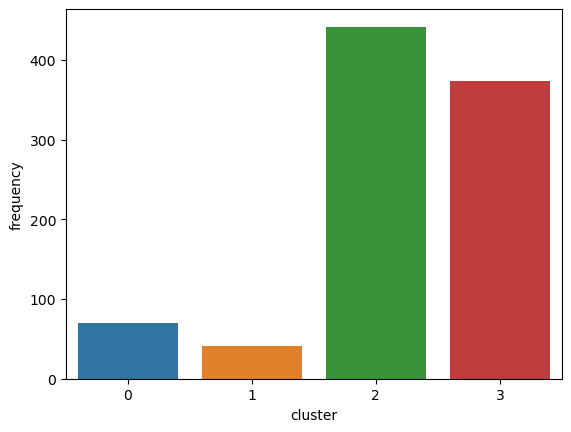

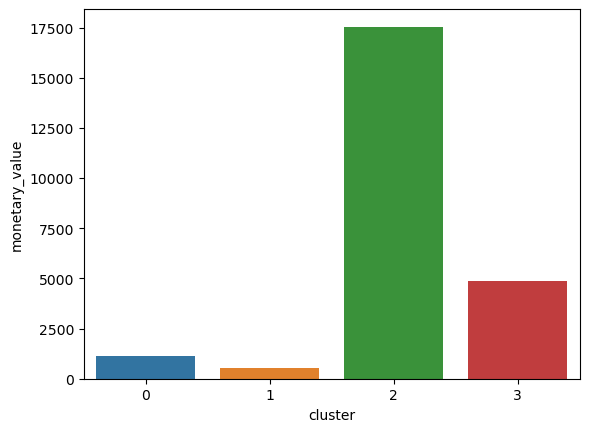

In [153]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

We want to fit to the original dataframe, we need to scale the values first to fit the model then inverse the scaling

In [154]:
df.describe(include='all')

C:\Users\27722\AppData\Local\Temp\ipykernel_9484\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year,Total,Date
count,1004437,1004437,1004437,1.004437e+06,1004437,1.004437e+06,1.004437e+06,1004437,1004437,1.004437e+06,1004437
unique,39752,4911,5392,NaN,36928,NaN,NaN,43,25,NaN,36928
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11,NaN,2011-10-31 14:41:00
freq,1113,5511,5601,NaN,1113,NaN,NaN,924345,81790,NaN,1113
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-01 07:45:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-09 12:50:00
mean,NaN,NaN,NaN,1.114842e+01,NaN,3.517832e+00,1.633915e+04,NaN,NaN,1.974415e+01,NaN
std,NaN,NaN,NaN,1.286908e+02,NaN,2.750591e+01,2.428512e+03,NaN,NaN,2.016917e+02,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e-03,1.234600e+04,NaN,NaN,1.000000e-03,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,1.436500e+04,NaN,NaN,4.130000e+00,NaN


In [157]:
rfm_data.reset_index(inplace=True)


,index,CustomerID,recency,frequency,monetary_value
0,0,12346.0,326,34,77556.46
1,1,12347.0,2,222,4921.53
2,2,12348.0,75,46,1658.40
3,3,12349.0,19,172,3678.69
4,4,12350.0,310,16,294.40
...,...,...,...,...,...
8583,8583,20989.0,1,2,3.35
8584,8584,20990.0,1,634,5699.00
8585,8585,20991.0,1,730,6756.06
8586,8586,20992.0,1,59,3217.20


In [158]:
rfm_data.drop(columns='index',inplace=True)

In [160]:
rfm_data.nunique()

CustomerID        8588
recency            698
frequency          726
monetary_value    7958
dtype: int64

In [161]:
#scale
scaled_units = scaler.transform(rfm_data[['recency','frequency','monetary_value']].values)

rfm_data['Cluster'] = kmeans.predict(scaled_units)
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8588 entries, 0 to 8587
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8588 non-null   float64
 1   recency         8588 non-null   int64  
 2   frequency       8588 non-null   int64  
 3   monetary_value  8588 non-null   float64
 4   Cluster         8588 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 302.1 KB


c:\Users\27722\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [163]:
df['CustomerID'] = df['CustomerID'].astype(str)
rfm_data['CustomerID'] = rfm_data['CustomerID'].astype(str)

In [165]:
merged_df = pd.merge(df, rfm_data, on='CustomerID', how='left')
merged_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year,Total,Date,recency,frequency,monetary_value,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.40,2009-12-01 07:45:00,158,84,2433.28,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,2009-12-01 07:45:00,158,84,2433.28,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,2009-12-01 07:45:00,158,84,2433.28,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,100.80,2009-12-01 07:45:00,158,84,2433.28,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.00,2009-12-01 07:45:00,158,84,2433.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004432,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12,19.80,2011-12-09 12:50:00,1,49,790.81,0
1004433,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12,19.80,2011-12-09 12:50:00,1,49,790.81,0
1004434,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,2011-12-09 12:50:00,1,49,790.81,0
1004435,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12,15.00,2011-12-09 12:50:00,1,49,790.81,0


In [166]:
merged_df.to_csv('RFMdata.csv')

In [168]:
#I want to count the number of customers in each cluster
merged_df.groupby("Cluster").agg({"CustomerID":"nunique","Quantity":"sum","Price":"mean","Total":"sum"})

,CustomerID,Quantity,Price,Total
Cluster,,,,
0,3999,2539478,3.455303,4536961.177
1,3373,815982,4.489310,1852810.652
2,249,5216562,3.453025,8711836.384
3,967,2625867,3.237724,4730145.354


In [170]:
merged_df.pivot_table(index='Cluster')

C:\Users\27722\AppData\Local\Temp\ipykernel_9484\2411872983.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  merged_df.pivot_table(index='Cluster')


,Price,Quantity,Total,frequency,monetary_value,recency
Cluster,,,,,,
0,3.455303,9.144154,16.336694,123.872344,1664.612369,98.430058
1,4.489310,5.841085,13.263067,121.086888,1262.320830,502.538430
2,3.453025,24.372244,40.702478,2909.226522,66077.455604,25.116218
3,3.237724,7.040103,12.681797,477.042623,5053.197933,100.138439


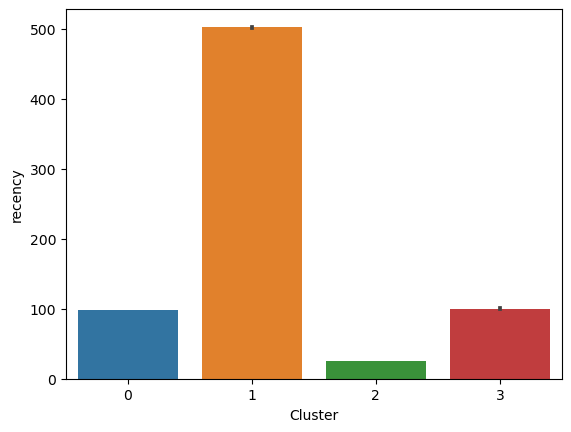

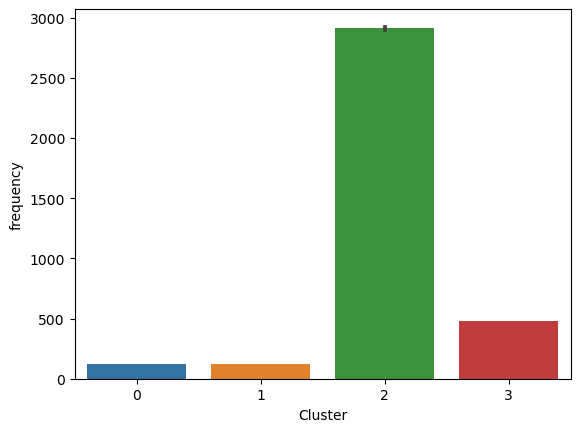

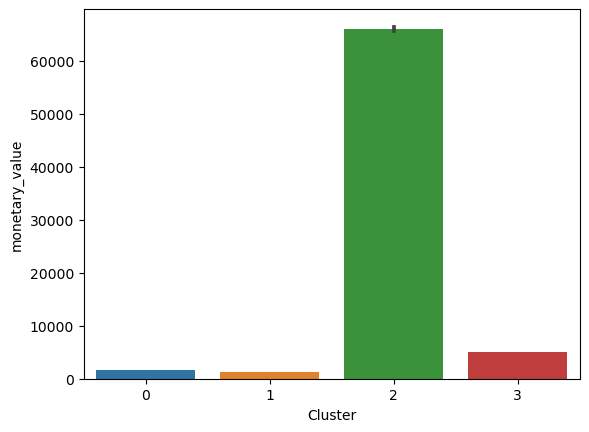

In [172]:
for i in list1:
    sns.barplot(x='Cluster',y=str(i),data=merged_df)
    plt.show()

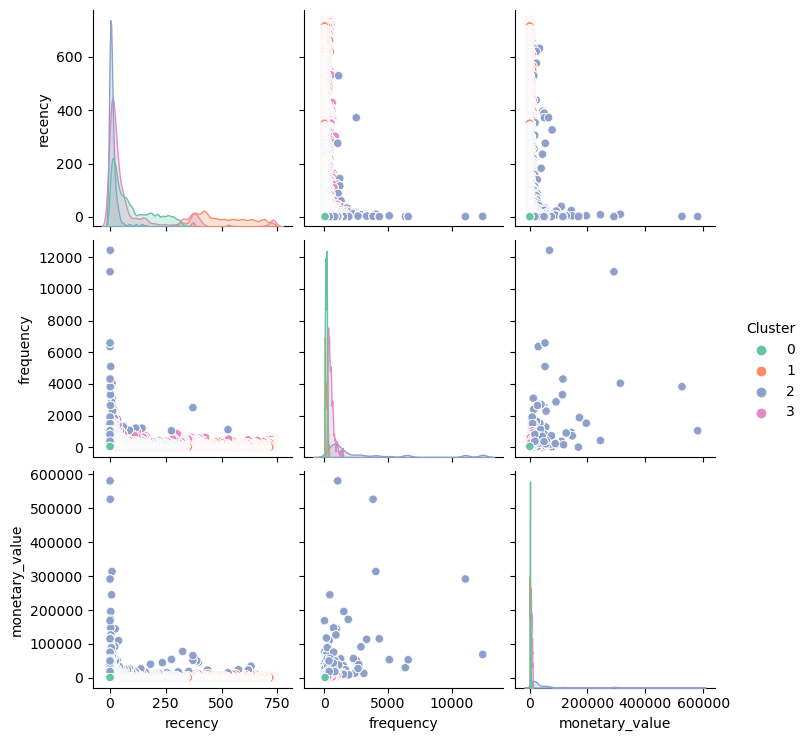

In [173]:
sns.pairplot(data=merged_df,vars=list1,hue='Cluster',palette='Set2')

In [174]:
merged_df.groupby('Cluster')['CustomerID'].nunique()

Cluster
0    3999
1    3373
2     249
3     967
Name: CustomerID, dtype: int64

In [180]:
sales_by_cluster = merged_df.groupby(['Cluster','Month_Year']).agg({'CustomerID':'count','Quantity':'sum','Total':'sum'}).reset_index()

In [182]:
sales_by_cluster

,Cluster,Month_Year,CustomerID,Quantity,Total
0,0,2009-12,5279,57526,96526.730
1,0,2010-01,3828,42974,72781.851
2,0,2010-02,4257,43231,73865.833
3,0,2010-03,5792,59930,100368.380
4,0,2010-04,5469,65103,111025.230
...,...,...,...,...,...
85,3,2011-08,11023,100502,175296.210
86,3,2011-09,14335,119823,196182.440
87,3,2011-10,21625,142768,251021.000
88,3,2011-11,37350,202142,410111.290


In [183]:
clusters = sales_by_cluster['Cluster'].unique()
clusters

array([0, 1, 2, 3], dtype=int64)

In [184]:
colors = ['skyblue', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


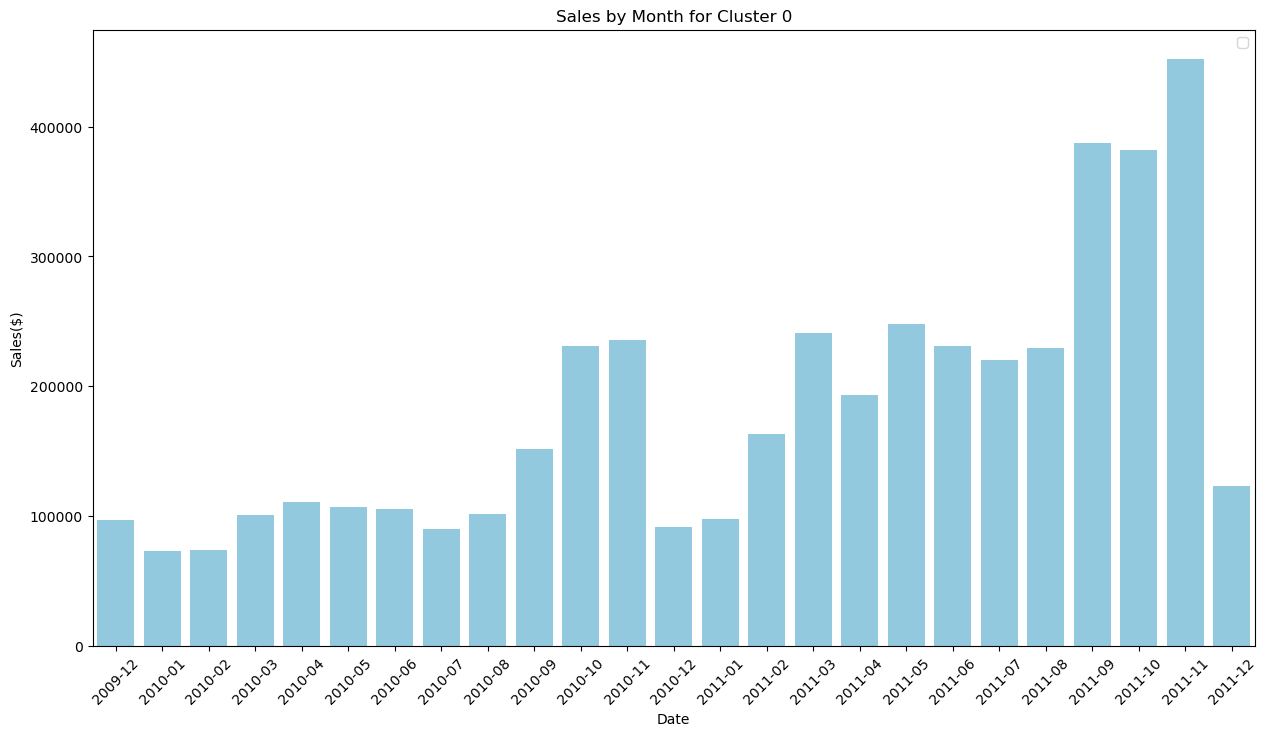

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


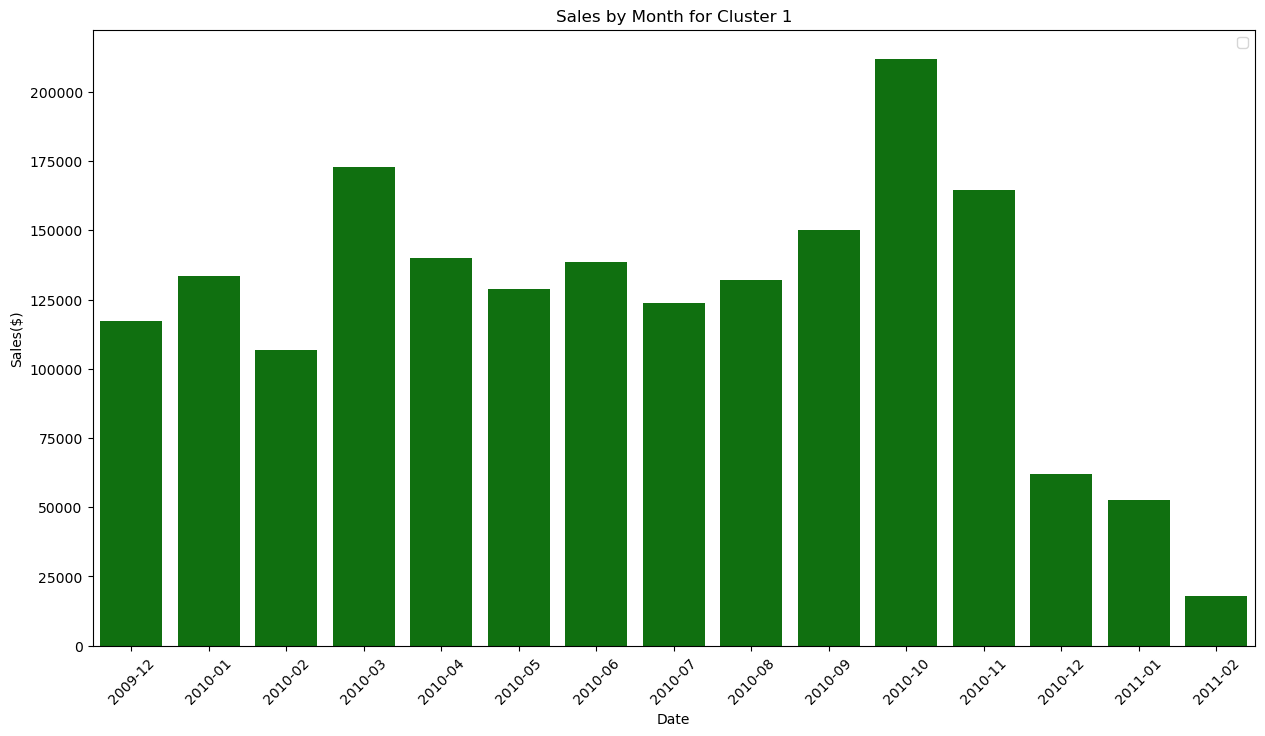

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


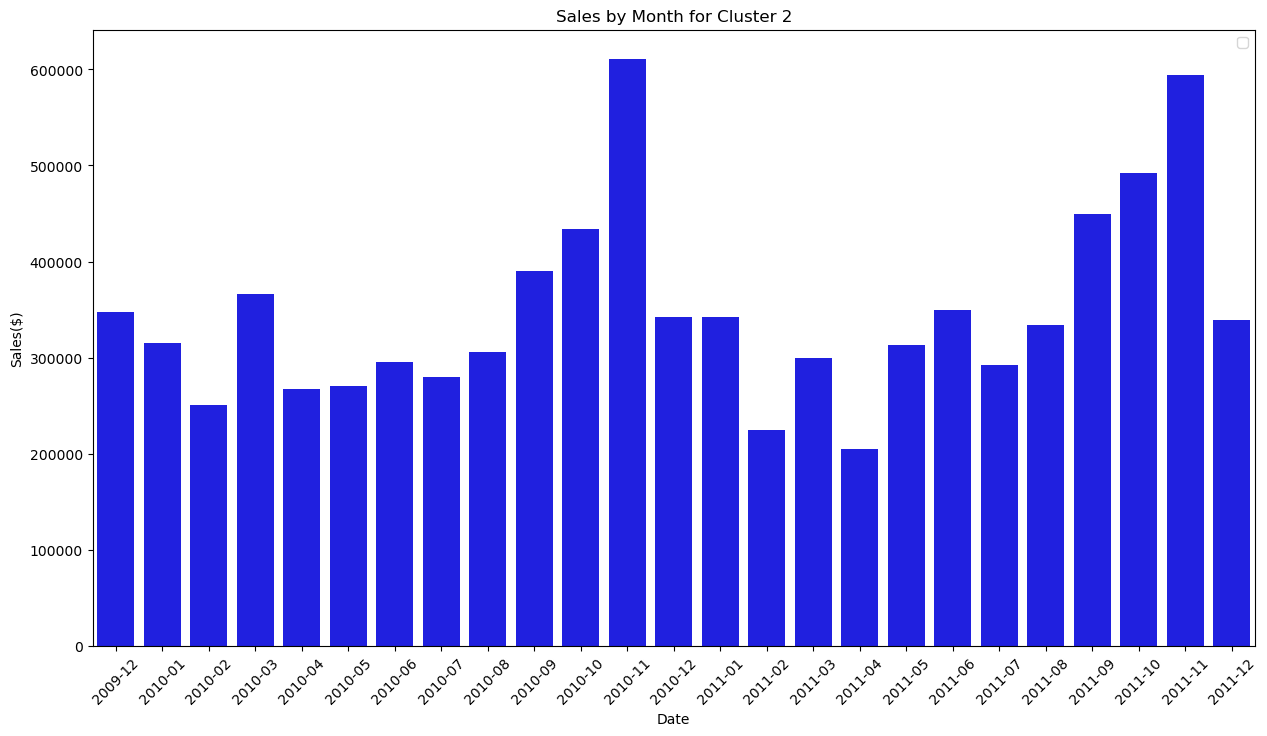

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


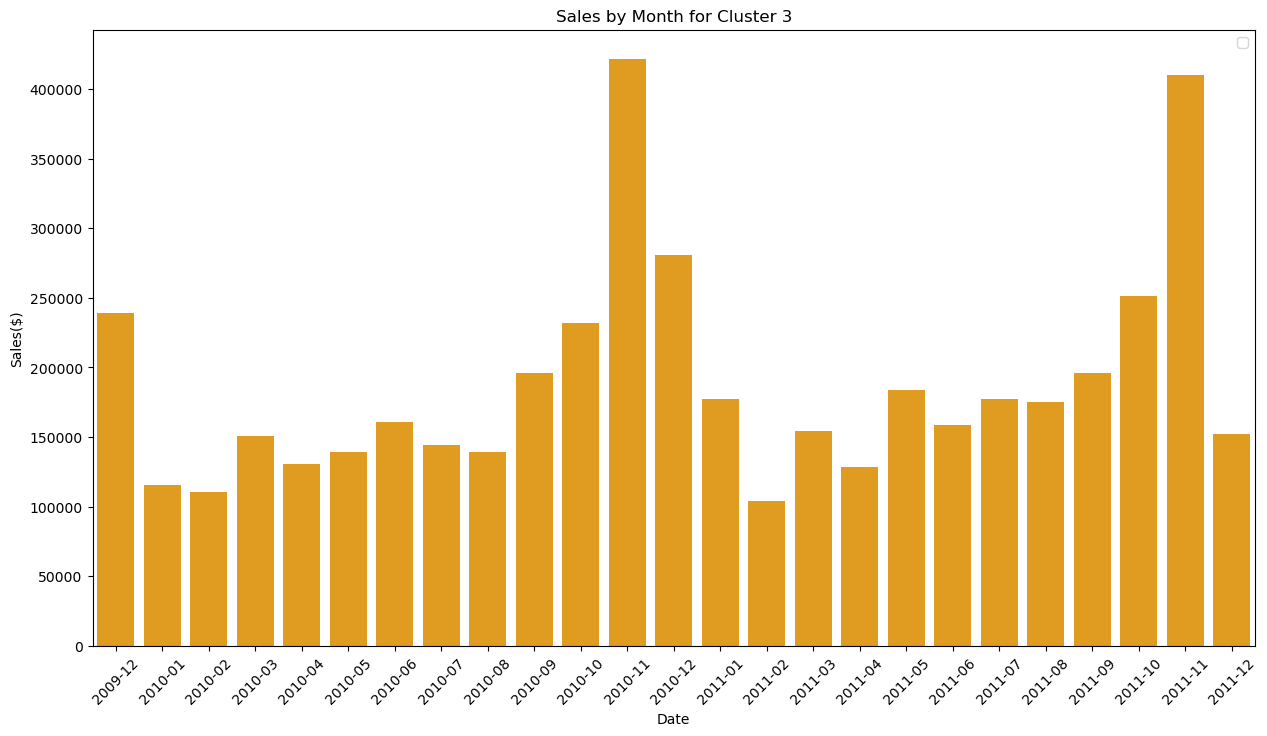

In [179]:
for i in clusters:
    cluster_data = sales_by_cluster[sales_by_cluster['Cluster'] == i]
    
    plt.figure(figsize=(15, 8))  # Adjust figure size as needed
    sns.barplot(data=cluster_data,x='Month_Year',y='Total',color=colors[i],estimator='sum')
    
    
    plt.xlabel('Date')
    plt.ylabel('Sales($)')
    plt.title(f'Sales by Month for Cluster {i}')
    plt.legend()
    plt.xticks(rotation=45)
    # Optionally, save each plot to a file
    # plt.savefig(f'sales_over_time_cluster_{cluster}.png')
    
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


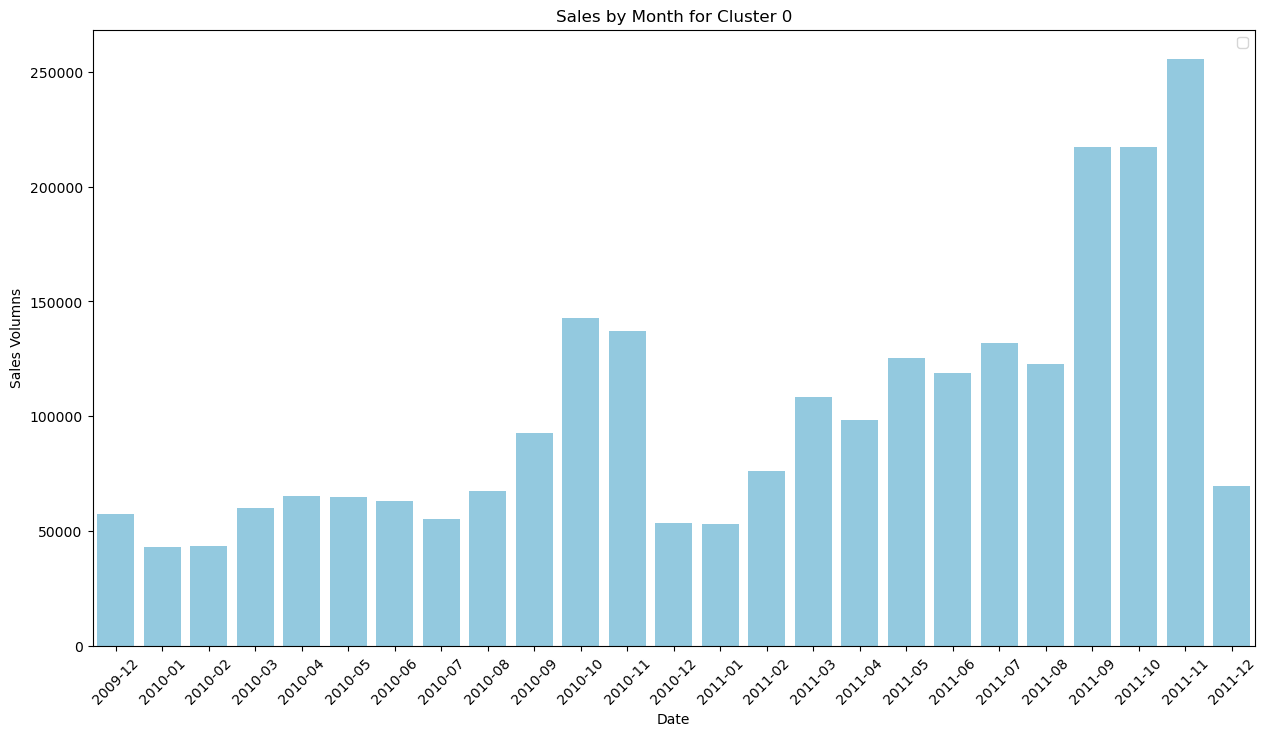

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


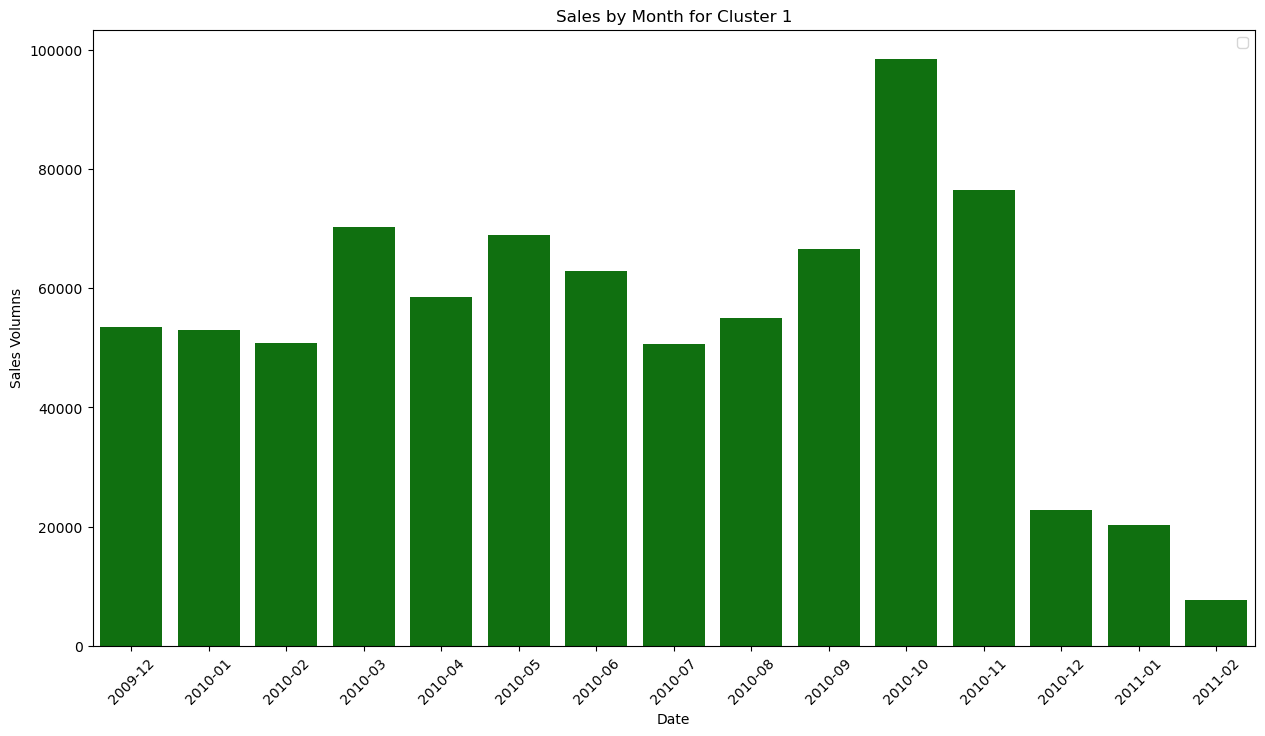

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


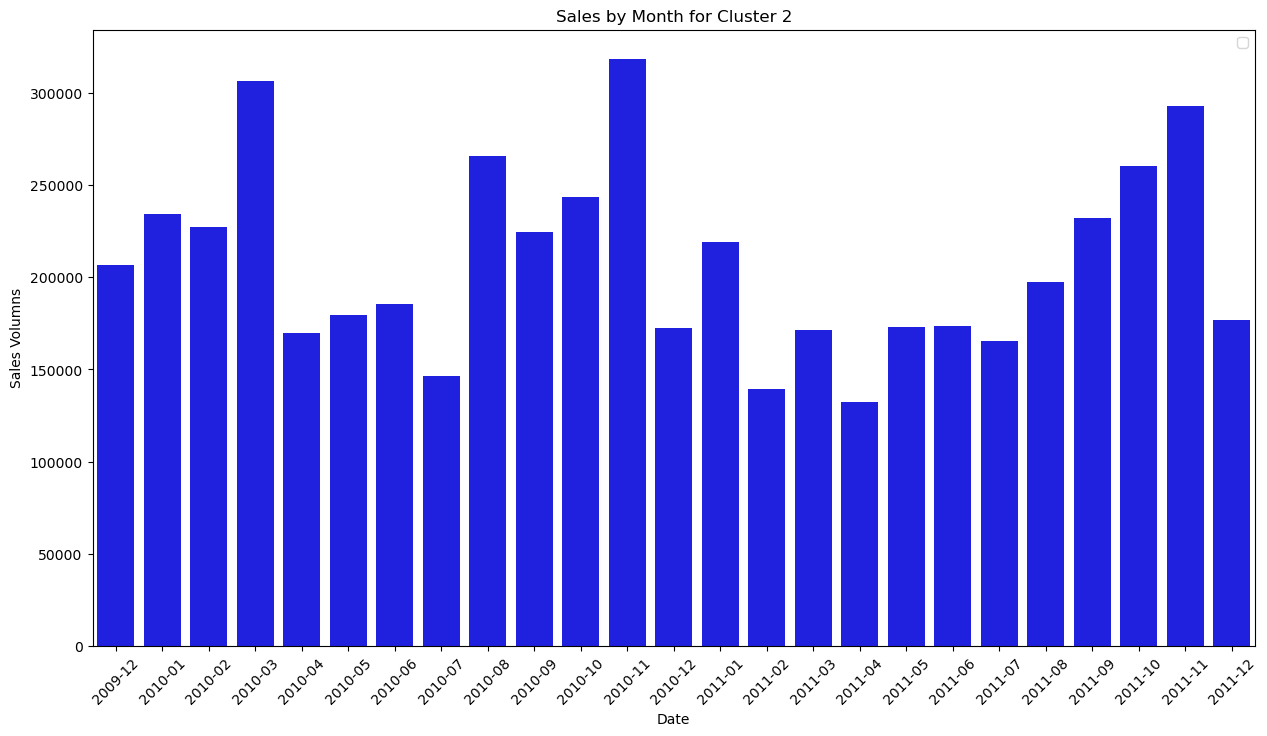

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


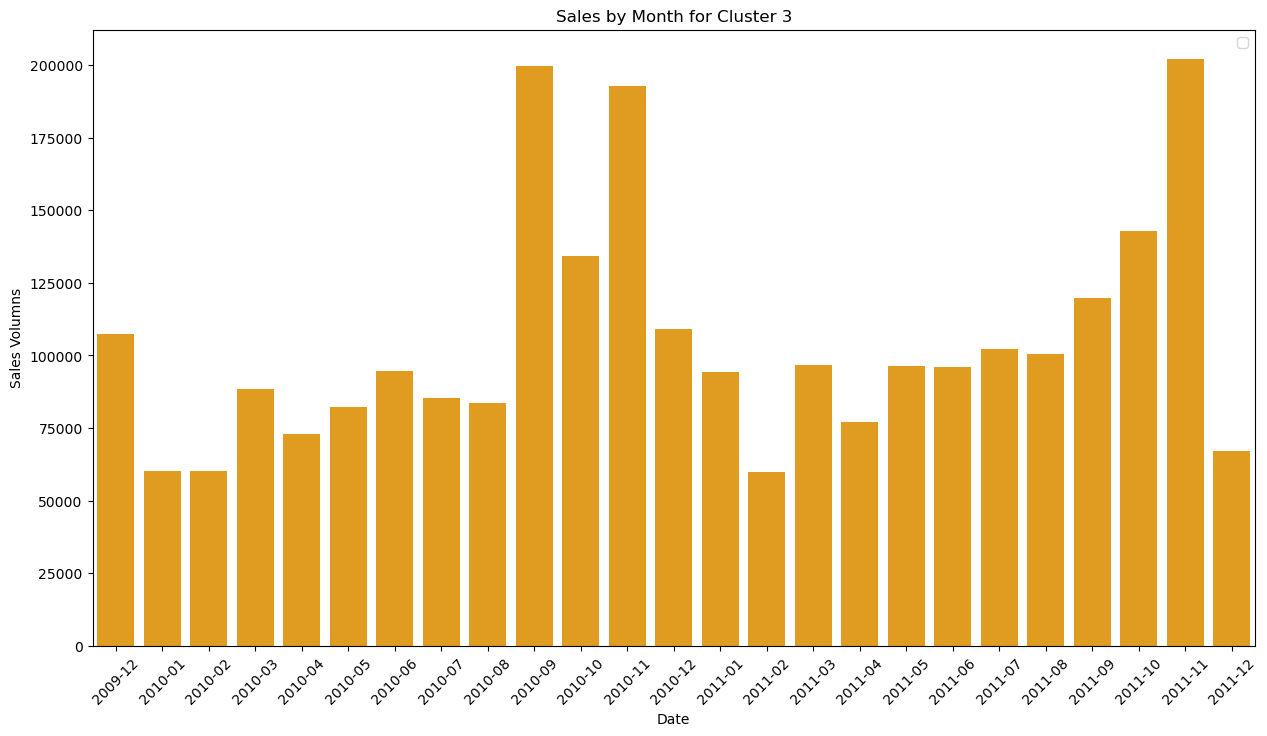

In [185]:
for i in clusters:
    cluster_data = sales_by_cluster[sales_by_cluster['Cluster'] == i]
    
    plt.figure(figsize=(15, 8))  # Adjust figure size as needed
    sns.barplot(data=cluster_data,x='Month_Year',y='Quantity',color=colors[i],estimator='sum')
    
    
    plt.xlabel('Date')
    plt.ylabel('Sales Volumns')
    plt.title(f'Sales by Month for Cluster {i}')
    plt.legend()
    plt.xticks(rotation=45)
    # Optionally, save each plot to a file
    # plt.savefig(f'sales_over_time_cluster_{cluster}.png')
    
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                          Description  Quantity     Total
0         SMALL CHINESE STYLE SCISSOR     27165   8743.30
1   WORLD WAR 2 GLIDERS ASSTD DESIGNS     18207   4832.76
2       ASSORTED COLOUR BIRD ORNAMENT     17101  28239.09
3  WHITE HANGING HEART T-LIGHT HOLDER     16446  46186.14
4                 BROCADE RING PURSE      15676   3412.72
5           ASSORTED COLOURS SILK FAN     15605  11520.63
6             JUMBO BAG RED RETROSPOT     12118  26411.57
7     VICTORIAN GLASS HANGING T-LIGHT     11178  15933.10
8     PACK OF 72 RETROSPOT CAKE CASES     10846   8140.86
9             MINI PAINT SET VINTAGE      10639   6900.87


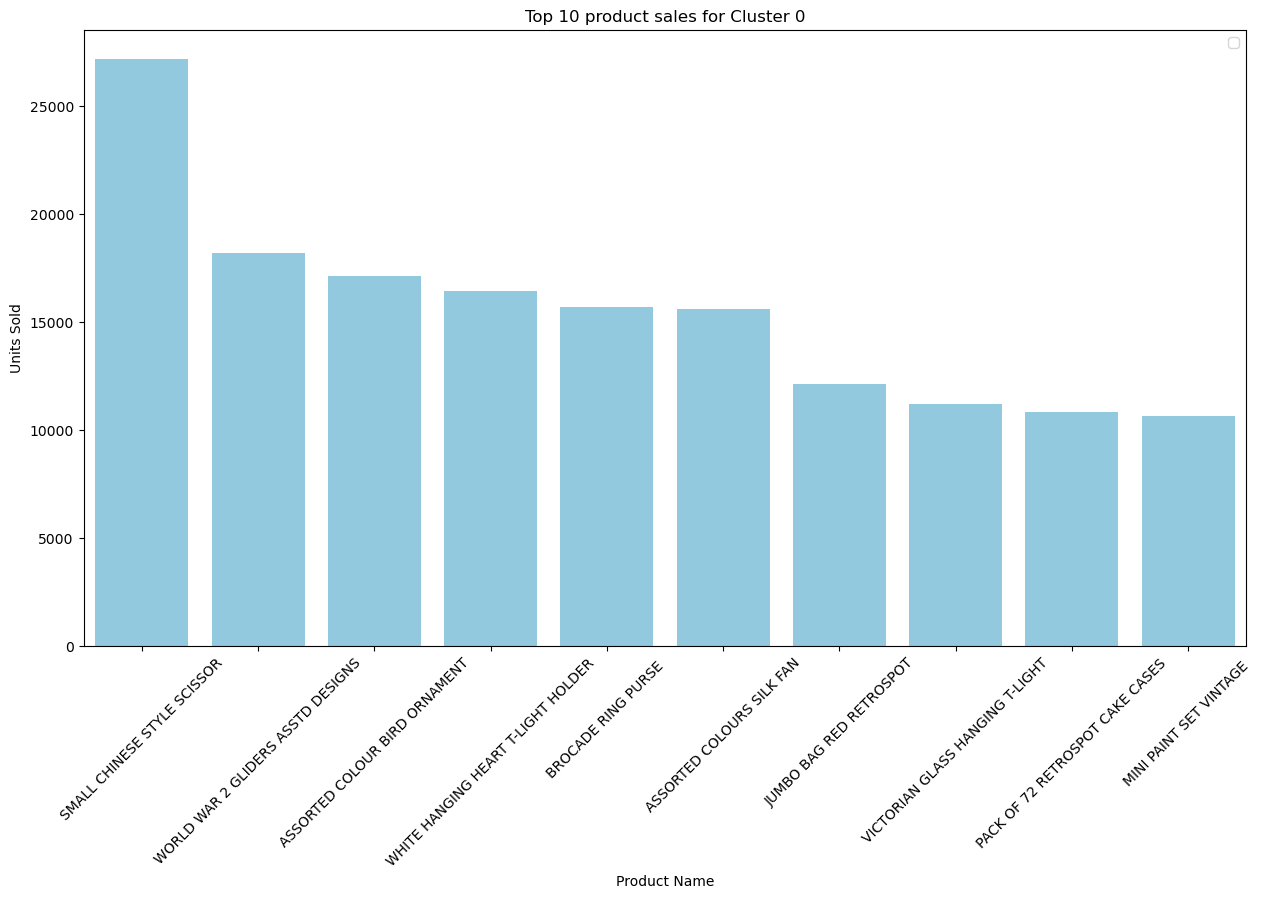

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                          Description  Quantity     Total
0  WHITE HANGING HEART T-LIGHT HOLDER      6865  20811.51
1     GIRLS ALPHABET IRON ON PATCHES       6453   1570.79
2        ASSTD DESIGN BUBBLE GUM RING      6138   1365.10
3       BOYS ALPHABET IRON ON PATCHES      5414   1250.90
4      STRAWBERRY CERAMIC TRINKET BOX      5263   7904.86
5    PACK OF 72 RETRO SPOT CAKE CASES      4940   3713.10
6         60 TEATIME FAIRY CAKE CASES      4370   2541.18
7   WORLD WAR 2 GLIDERS ASSTD DESIGNS      4308   1013.16
8               MINI HIGHLIGHTER PENS      4080    392.40
9             LUNCH BAG  BLACK SKULL.      3902   6598.68


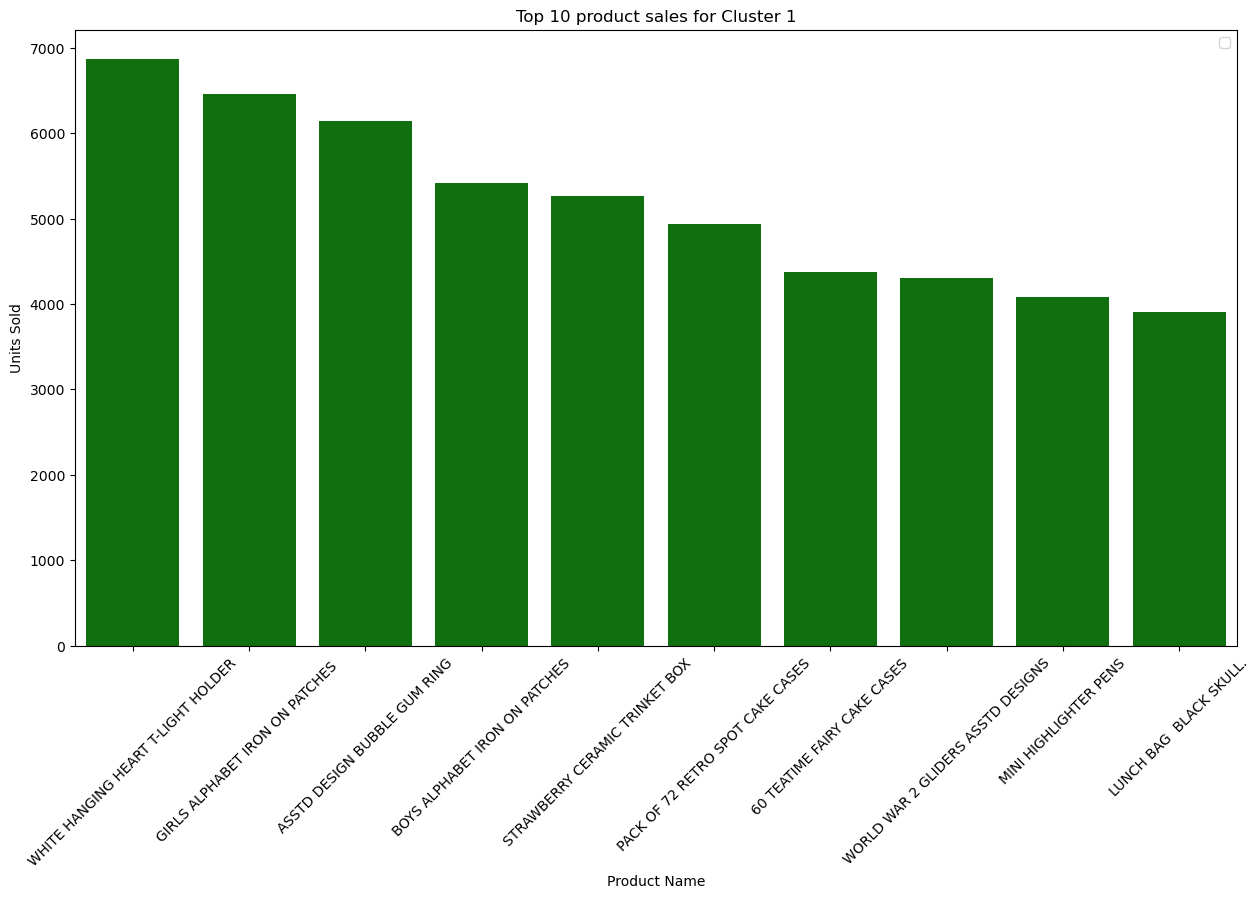

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                          Description  Quantity      Total
0         PAPER CRAFT , LITTLE BIRDIE     80995  168469.60
1      MEDIUM CERAMIC TOP STORAGE JAR     76368   79569.63
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     64303   13646.25
3  WHITE HANGING HEART T-LIGHT HOLDER     50295  133494.73
4             JUMBO BAG RED RETROSPOT     47800   84116.69
5                 BROCADE RING PURSE      46415    9194.01
6       ASSORTED COLOUR BIRD ORNAMENT     41770   64161.22
7  PACK OF 60 PINK PAISLEY CAKE CASES     32468   14806.00
8                SMALL POPCORN HOLDER     30626   26777.60
9         60 TEATIME FAIRY CAKE CASES     29214   13423.49


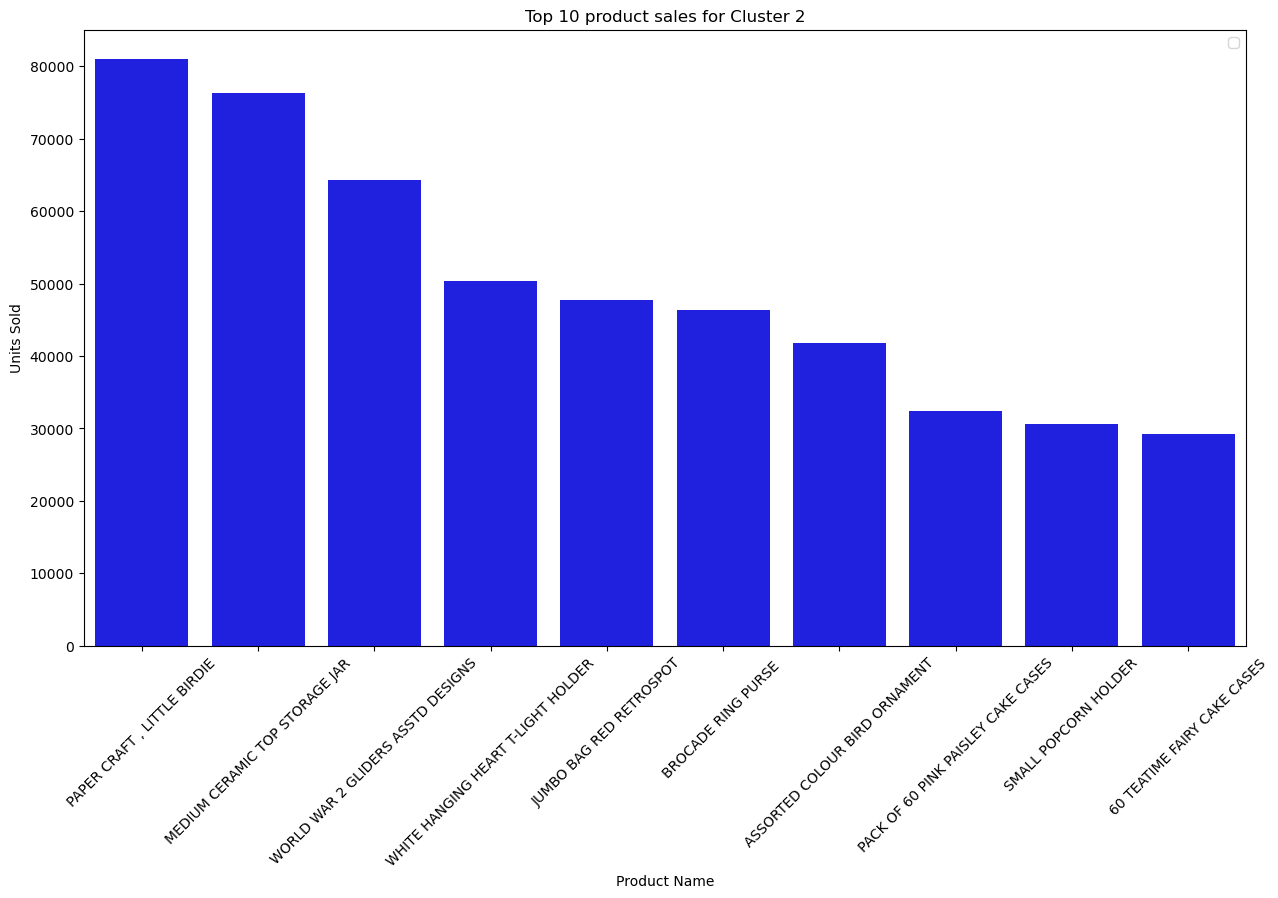

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                           Description  Quantity     Total
0   WHITE HANGING HEART T-LIGHT HOLDER     21052  60497.84
1    WORLD WAR 2 GLIDERS ASSTD DESIGNS     19321   4953.44
2        ASSORTED COLOUR BIRD ORNAMENT     17576  30054.01
3           PACK OF 12 LONDON TISSUES      16891   4725.33
4              JUMBO BAG RED RETROSPOT     15641  31021.35
5            PLACE SETTING WHITE HEART     12787   5255.59
6      GIRLS ALPHABET IRON ON PATCHES      12293   2616.17
7   PACK OF 60 PINK PAISLEY CAKE CASES     11949   6434.78
8          60 TEATIME FAIRY CAKE CASES     11472   6161.31
9  COLOUR GLASS T-LIGHT HOLDER HANGING     10752   6854.29


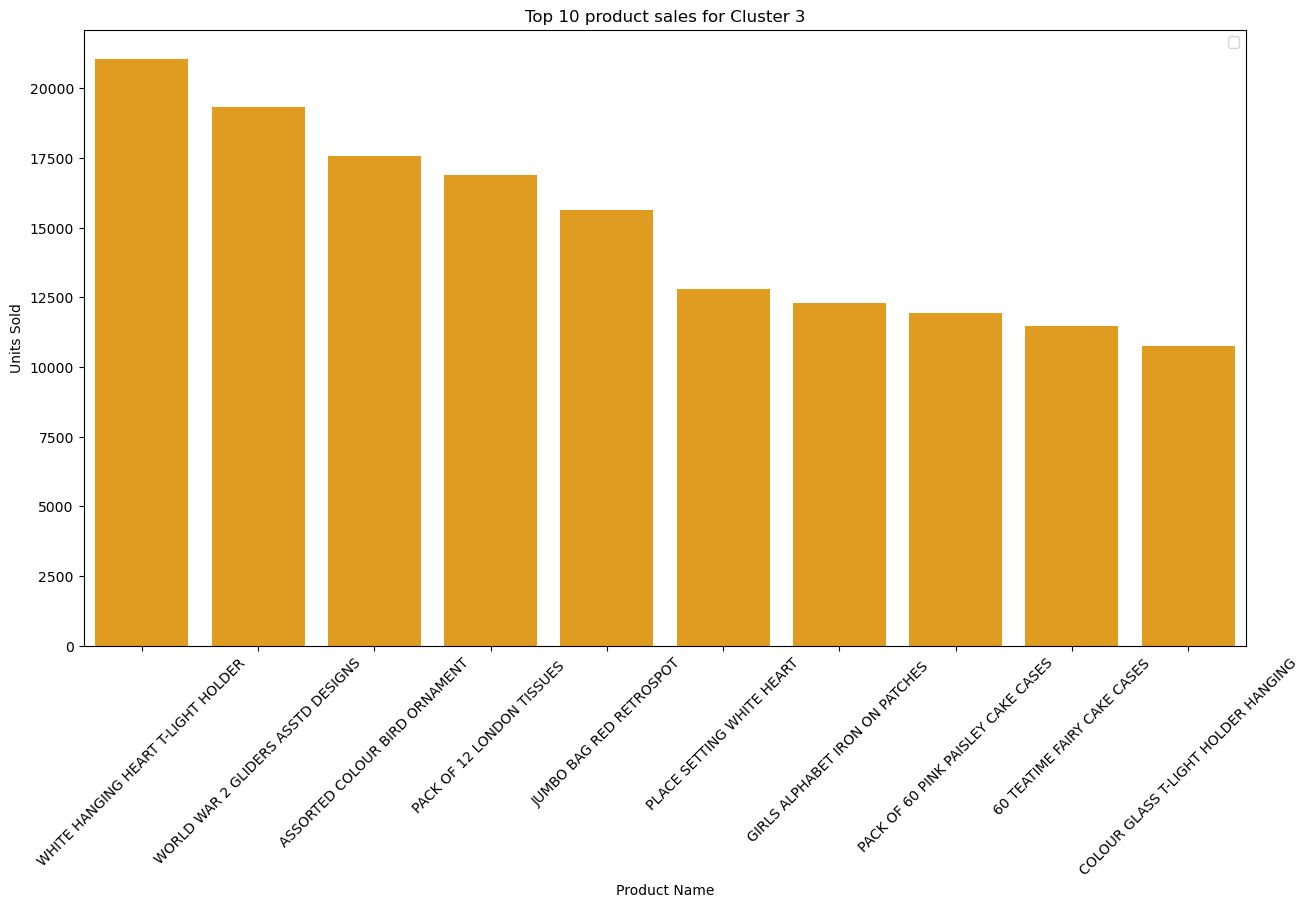

In [186]:
for i in clusters:
    top_products = merged_df[merged_df['Cluster'] == i]
    top_pivot = top_products.pivot_table(index='Description',values=['Quantity','Total'],aggfunc='sum' ).sort_values(by='Quantity',ascending=False)
    top_10 = top_pivot.head(10).reset_index()
    print(top_10)
    
    
    plt.figure(figsize=(15, 8))  # Adjust figure size as needed
    sns.barplot(data=top_10,x='Description',y='Quantity',color=colors[i],estimator='sum')
    
    
    plt.xlabel('Product Name')
    plt.ylabel('Units Sold')
    plt.title(f'Top 10 product sales for Cluster {i}')
    plt.legend()
    plt.xticks(rotation=45)
    # Optionally, save each plot to a file
    # plt.savefig(f'sales_over_time_cluster_{cluster}.png')
    
    plt.show()

In [187]:
merged_df.groupby(['Country','Cluster']).agg({'CustomerID':'count','Total':'sum'}).head(10).reset_index()

,Country,Cluster,CustomerID,Total
0,Australia,0,497,14156.67
1,Australia,1,119,2968.63
2,Australia,2,925,144108.37
3,Australia,3,247,7699.79
4,Austria,0,452,12692.32
5,Austria,1,168,3178.00
6,Austria,3,270,4686.69
7,Bahrain,0,59,1354.37
8,Bahrain,1,65,1755.42
9,Belgium,0,1319,25238.38


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          Country  CustomerID   Quantity      Total
0  United Kingdom        3672   8.778579  15.839855
1         Germany          64  14.001106  21.936115
2          France          57  13.277573  20.800215
3           Spain          23   9.034323  15.735855
4            EIRE          22  10.396694  21.269521
5         Belgium          17  13.959060  19.134481
6     Switzerland          17  11.216000  19.907960
7        Portugal          13  11.657143  21.103131
8         Finland          11  15.660522  27.715714
9           Italy          10  11.241972  21.680000


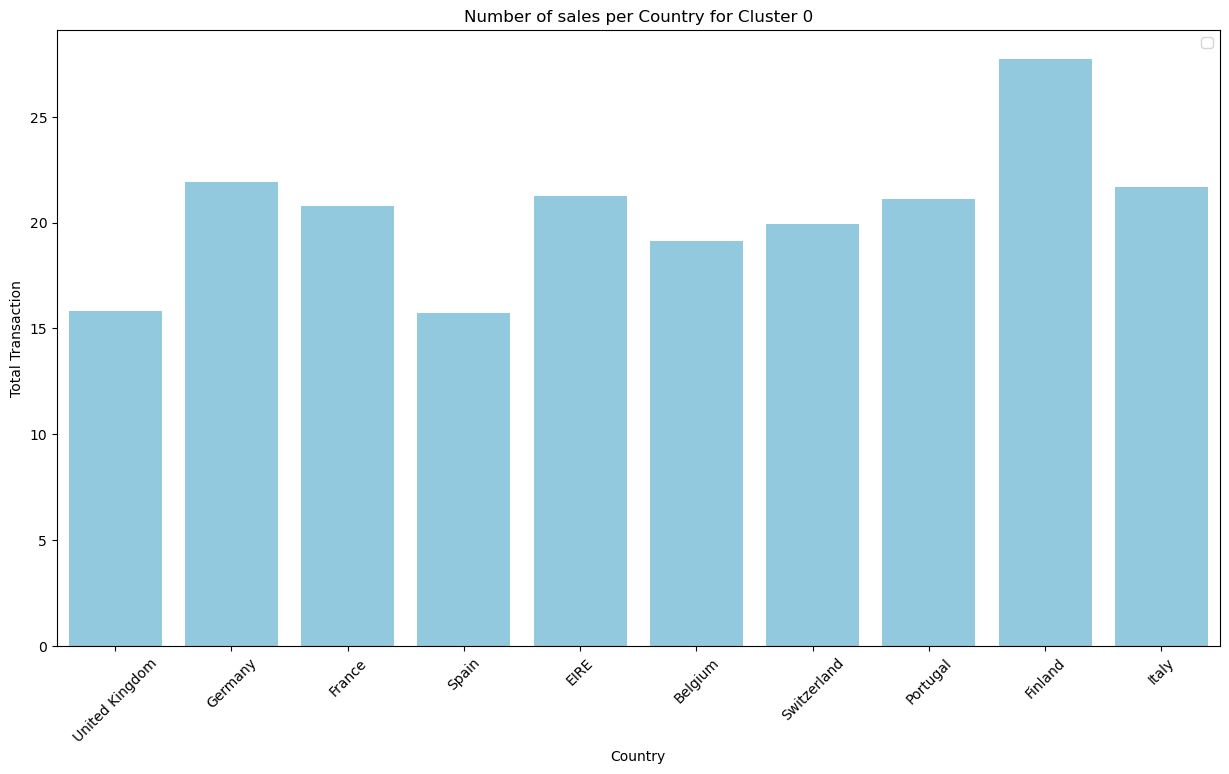

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          Country  CustomerID   Quantity      Total
0  United Kingdom        3174   5.491949  12.815081
1            EIRE          36  12.236253  25.800143
2          France          23  10.191589  25.630374
3         Germany          18  13.314241  19.527014
4     Netherlands          14  16.189189  24.385094
5           Spain          11  14.960000  21.903371
6          Sweden          11  11.890819  18.402779
7        Portugal           9   7.162055  13.974585
8       Australia           7  12.907563  24.946471
9         Belgium           6  10.050251  20.577739


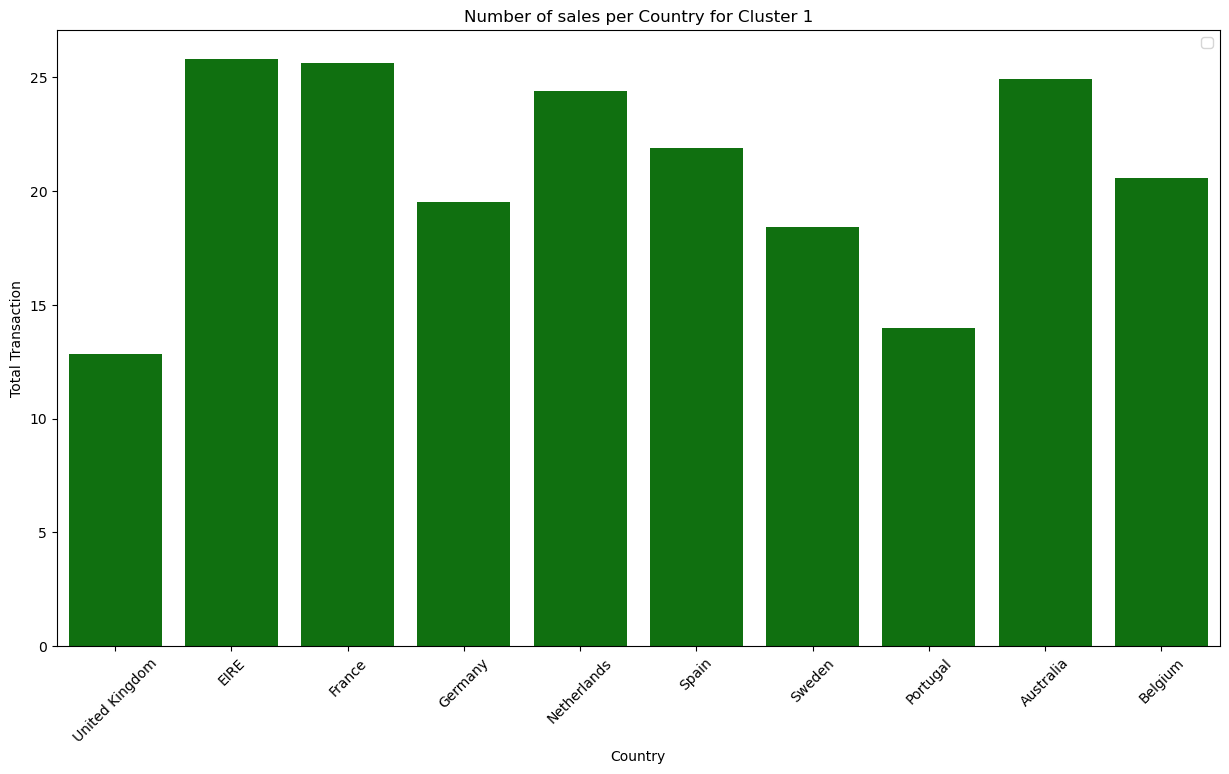

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          Country  CustomerID     Quantity       Total
0  United Kingdom         210    21.229098   37.993937
1          France           9    33.457928   32.254488
2         Germany           9    14.730244   28.812455
3           Spain           4    22.135682   48.720510
4            EIRE           3    20.435548   39.599463
5     Switzerland           3    27.209542   50.034453
6         Denmark           2  1296.287356  275.570057
7          Norway           2    24.128342   54.742389
8          Sweden           2   157.640974  144.745477
9       Australia           1    98.860541  155.792832


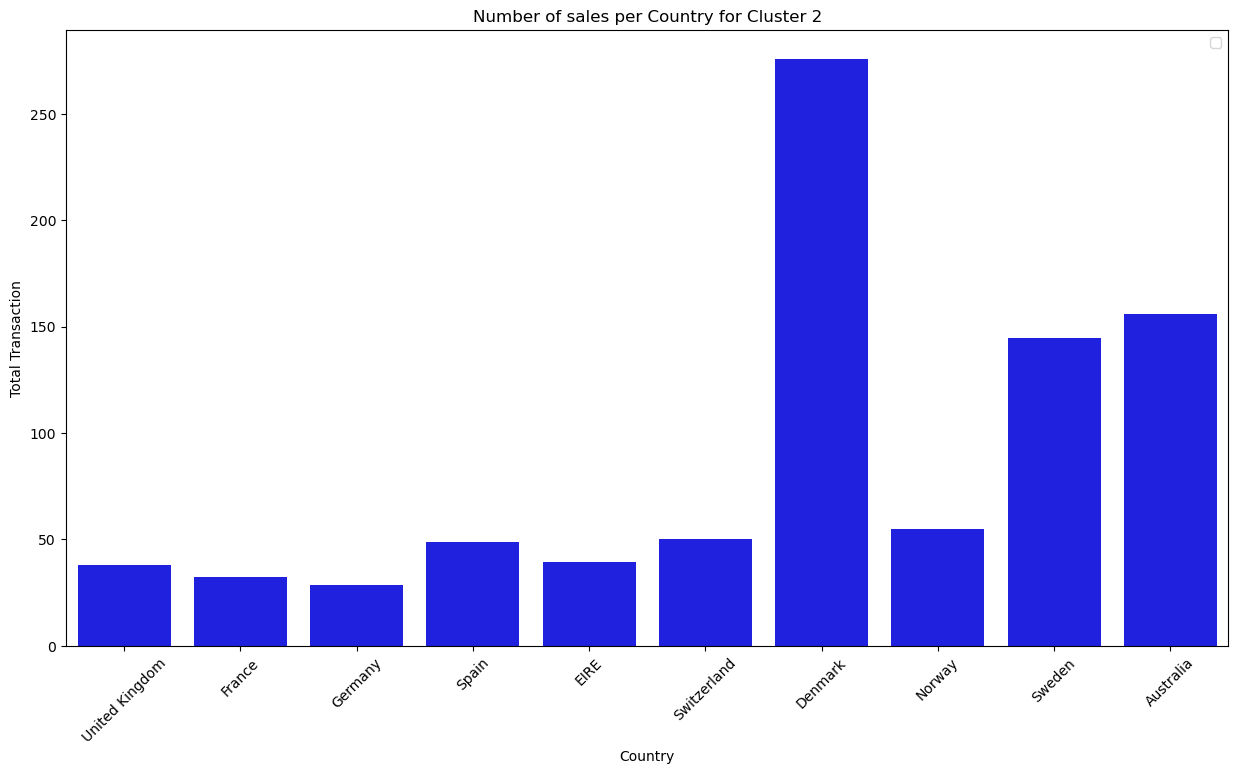

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          Country  CustomerID   Quantity      Total
0  United Kingdom         904   6.799587  12.242831
1         Germany          16  13.569908  22.064063
2          France          14  10.805392  18.246998
3         Belgium           6   9.997131  20.924297
4          Cyprus           4   9.321911  20.695701
5        Portugal           4  12.049651  23.024919
6         Denmark           3  22.344262  41.079967
7         Austria           3  10.862963  17.358111
8     Switzerland           3  12.761429  20.708500
9           Spain           3   7.702403  12.457338


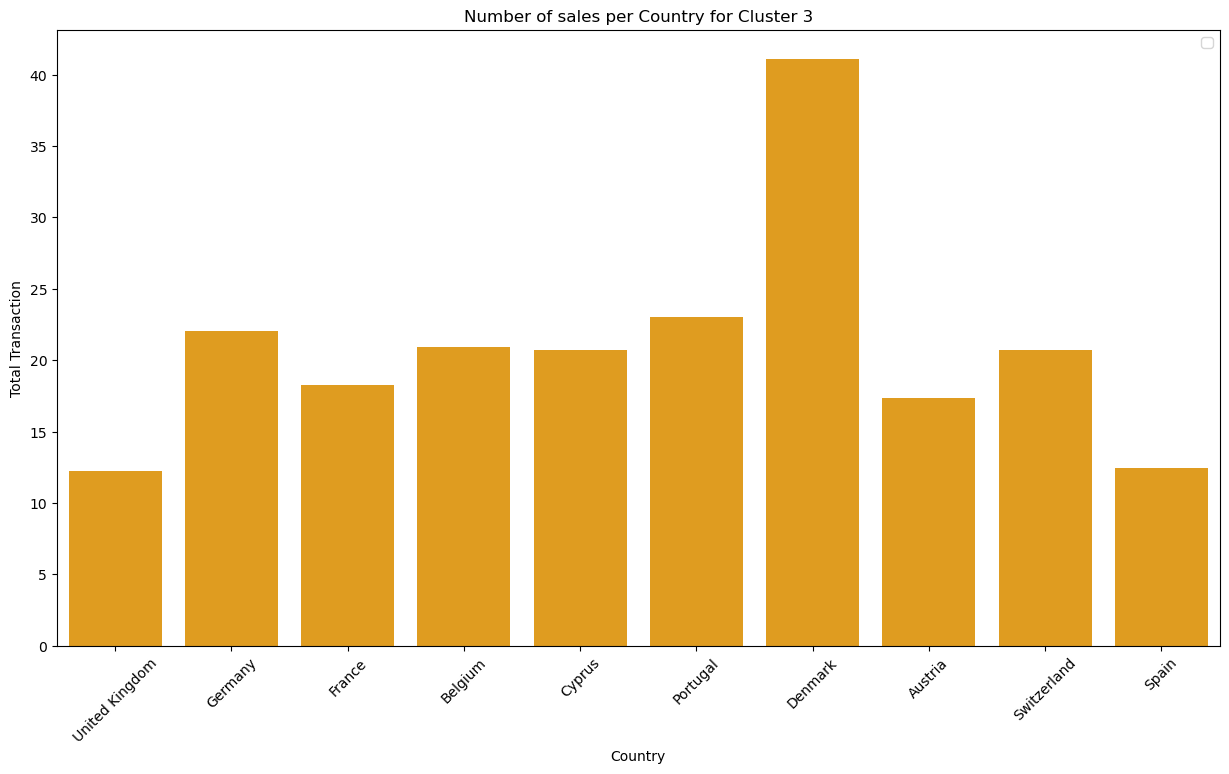

In [193]:
for i in clusters:
    geo_pivot = merged_df[merged_df['Cluster'] == i]
    top_geo = geo_pivot.groupby('Country').agg({'CustomerID':'nunique','Quantity':'mean','Total':'mean'}).sort_values(by='CustomerID',ascending=False)
    top_10g = top_geo.head(10).reset_index()
    print(top_10g)
    
    
    plt.figure(figsize=(15, 8))  # Adjust figure size as needed
    sns.barplot(data=top_10g,x='Country',y='Total',color=colors[i],estimator='sum')
    
    
    plt.xlabel('Country')
    plt.ylabel('Total Transaction')
    plt.title(f'Number of sales per Country for Cluster {i}')
    plt.legend()
    plt.xticks(rotation=45)
    # Optionally, save each plot to a file
    # plt.savefig(f'sales_over_time_cluster_{cluster}.png')
    
    plt.show()

In [189]:
merged_df['Cluster'].value_counts()

3    372987
0    277716
2    214037
1    139697
Name: Cluster, dtype: int64